<a href="https://colab.research.google.com/github/Karame12/Projects/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the problem & data**

The dataset "uffi.csv" contains information on 24 houses, focusing on two key variables: the weekly average concentration of CH2O (formaldehyde) in parts per billion, and a measure of air tightness, rated on a scale from 0 to 10. Additionally, we have information about whether each house has urea formaldehyde foam insulation (UFFI), denoted by the variable "UFFI." The goal of our analysis is to build a support vector machine (SVM) classifier to predict whether a house includes UFFI or not based on two factors: the ambient formaldehyde concentration (CH2O) within the house and the amount of air (AIR) that can flow through the house via windows, cracks, chimneys, and other openings. We will employ this classifier to discern the presence or absence of UFFI in houses, aiding in understanding the relationship between air quality, air tightness, and insulation choices. In this analysis, we will apply the following validation approach: 50% of the data in the training set and 50% of the data in the test set.

In [ ]:
import pandas as pd
houses = pd.read_csv("uffi.csv")
train_houses = houses.sample(frac = 0.6, random_state = 10)
test_houses = houses.drop(train_houses.index)
train_houses.index = list(range(len(train_houses)))
houses.head(5)

,CH2O,AIR,UFFI
0,31.33,0,No
1,28.57,1,No
2,39.95,1,No
3,44.98,4,No
4,39.55,4,No


In [ ]:
train_houses.head(24)

,CH2O,AIR,UFFI
0,38.29,5,No
1,28.57,1,No
2,48.71,7,No
3,39.95,1,No
4,56.67,9,No
5,43.58,1,Yes
6,53.13,7,Yes
7,43.30,2,Yes
8,46.16,2,Yes
9,44.98,4,No


To begin our analysis, we will conduct some descriptive statistics calculations.

First, we will explore houses with UFFI and number of houses without UFFI. The results show the following:
- Number of houses with UFFI: 6
- Number of houses without UFFI: 8

In [ ]:
# Create two datasets to filter the houses with and without UFFI:
houses_with_uffi = train_houses[train_houses['UFFI'] == 'Yes']
houses_without_uffi = train_houses[train_houses['UFFI'] == 'No']

# Return the number of elements in the dataset:
num_houses_with_uffi = len(houses_with_uffi)
num_houses_without_uffi = len(houses_without_uffi)

print("Number of houses with UFFI:", num_houses_with_uffi)
print("Number of houses without UFFI:", num_houses_without_uffi)

Number of houses with UFFI: 6
Number of houses without UFFI: 8


Second, we will compute the average CH2O concentration for houses with UFFI and for houses without UFFI.
- Average CH2O concentration for houses with UFFI: 50.44166666666666
- Average CH2O concentration for houses without UFFI: 46.067499999999995

In [ ]:
# Calculate the averages:
average_ch2o_with_uffi = houses_with_uffi['CH2O'].mean()
average_ch2o_without_uffi = houses_without_uffi['CH2O'].mean()

print("Average CH2O concentration for houses with UFFI:", average_ch2o_with_uffi)
print("Average CH2O concentration for houses without UFFI:", average_ch2o_without_uffi)


Average CH2O concentration for houses with UFFI: 50.44166666666666
Average CH2O concentration for houses without UFFI: 46.067499999999995


Third, we will calulcate the average measure of air tightness for houses with UFFI and for houses without UFFI.
- Average Measure of air tightness for houses with UFFI: 4.333333333333333
- Average Measure of air tightness for houses without UFFI: 5.25

In [ ]:
average_air_tightness_with_uffi = houses_with_uffi['AIR'].mean()
average_air_tightness_without_uffi = houses_without_uffi['AIR'].mean()

print("Average Measure of air tightness for houses with UFFI:", average_air_tightness_with_uffi)
print("Average Measure of air tightness for houses without UFFI:", average_air_tightness_without_uffi)

Average Measure of air tightness for houses with UFFI: 4.333333333333333
Average Measure of air tightness for houses without UFFI: 5.25


The plot below shows the relationship between wehther the house includes area formaldehyde foam insulation and the air movement. House with area formaldegyhde foam insulation has a higher ambient. Some points denoting "Yes" as their class on the plot are placed close to the points with "No" as their classification, which indicates that we can't fit a line to seperate the data into seperate classifications, menaing that a hyperplane doesn't exist, so we will need to proceed with using kernels to build the support vector classifier.

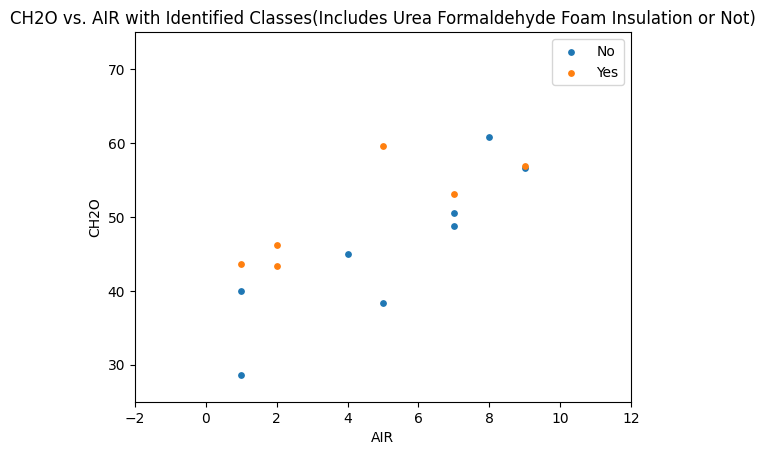

In [ ]:
import matplotlib.pyplot as plt

def Make_2D_Plot_with_Class_Identification(data, xVar, yVar, Class):
  for group_id, group_members in data.groupby(Class):
    plt.scatter(group_members[xVar], group_members[yVar], s=15, label=group_id)
  plt.xlabel(xVar)
  plt.ylabel(yVar)
  plt.xlim([-2, 12])
  plt.ylim([25, 75])
  plt.title(yVar + ' vs. ' + xVar + ' with Identified Classes(Includes Urea Formaldehyde Foam Insulation or Not)')
  plt.legend()
  plt.show()

Make_2D_Plot_with_Class_Identification(train_houses, 'AIR', 'CH2O', 'UFFI')


We will be first be using a linear kernel using 5-fold cross-validation (cv=5).To tune the data, we are using the following parameter 'C': [0.01, 0.1, 1, 10, 100]. The kernel shows that the best model from tuning is 'C': 0.1, so we will be using this parameter.

In [ ]:
# Model Estimation:
# Linear Model:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
train_predictor_variables = train_houses[['AIR', 'CH2O']]
parameters = {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output = tuning.fit(train_predictor_variables, train_houses['UFFI'])
tuning_output.best_params_
linearmodel = tuning_output.best_estimator_

{'C': 0.1, 'kernel': 'linear'}

Put the function here:

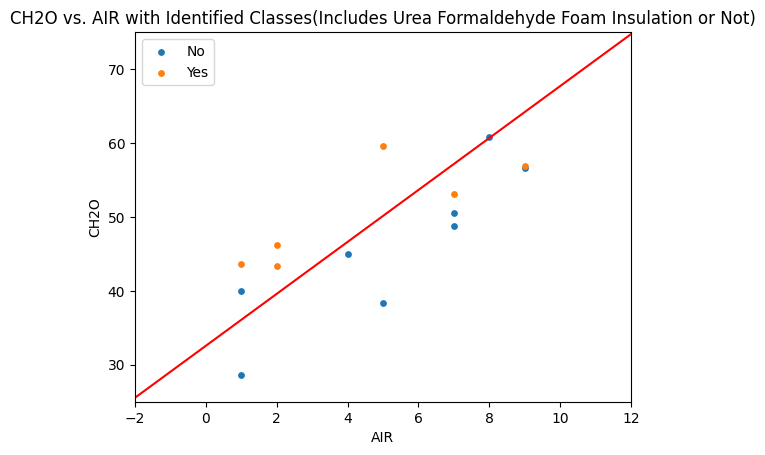

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def Make_2D_Plot_with_Class_Identification(data, xVar, yVar, Class, model=None):
  plt.xlim([-2, 12])
  plt.ylim([25, 75])

  for group_id, group_members in data.groupby(Class):
    plt.scatter(group_members[xVar], group_members[yVar], s=15, label=group_id)

  plt.xlabel(xVar)
  plt.ylabel(yVar)
  plt.title(yVar + ' vs. ' + xVar + ' with Identified Classes(Includes Urea Formaldehyde Foam Insulation or Not)')

  if model:
    # Model coefficients
    beta0 = model.intercept_[0]
    beta1 = model.coef_[0][0]
    beta2 = model.coef_[0][1]

    # Find the y-intercept and slope of the line.
    yint = -beta0 / beta2
    slope = -beta1 / beta2

    # Add the line
    x1 = np.linspace(-2, 12, 100)
    plt.plot(x1, yint + slope * x1, c='red')

  plt.legend()
  plt.show()

Make_2D_Plot_with_Class_Identification(train_houses, 'AIR', 'CH2O', 'UFFI', linearmodel)


In [ ]:
yint = -beta0 / beta2
slope = -beta1 / beta2
print(yint)
print(slope)
Xch2o = 32.561 + 3.513*Xair

32.56051898201539
3.5133905251296182


The decision boundary of the support vector classifier.

In [ ]:
est_lin = svm.SVC(kernel='linear', C=0.1)
model_lin = est_lin.fit(train_predictor_variables, train_houses['UFFI'])

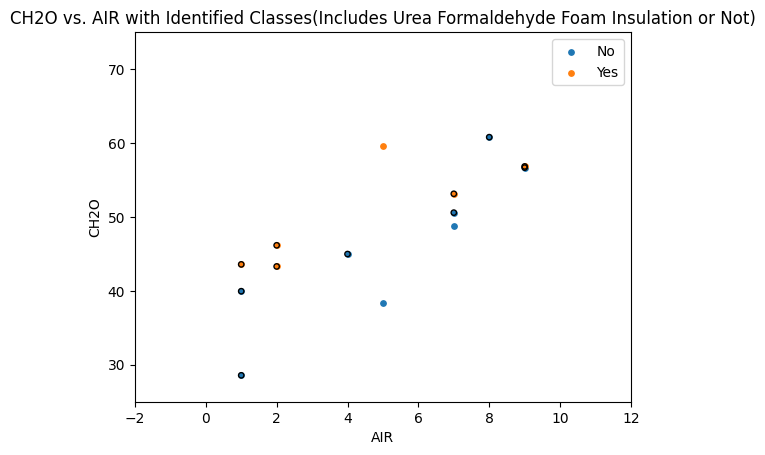

In [ ]:
#Original plot
def Make_2D_Plot_Decision_Boundary(data, xVar, yVar, Class, model=None):
    plt.xlim([-2, 12])
    plt.ylim([25, 75])

    for group_id, group_members in data.groupby(Class):
      plt.scatter(group_members[xVar], group_members[yVar], s=15, label=group_id)

    if model:
      x_values = [i[0] for i in model_lin.support_vectors_]
      y_values = [i[1] for i in model_lin.support_vectors_]
      plt.scatter(x_values, y_values, color = 'black',facecolors='none', s = 15)
      plt.title(yVar + ' vs. ' + xVar + ' with Identified Classes(Includes Urea Formaldehyde Foam Insulation or Not)')
      plt.xlabel(xVar)
      plt.ylabel(yVar)
    plt.legend()
    plt.show()

Make_2D_Plot_Decision_Boundary(train_houses, 'AIR', 'CH2O', 'UFFI', model_lin)


Linear Kernel Misclassified obeservations

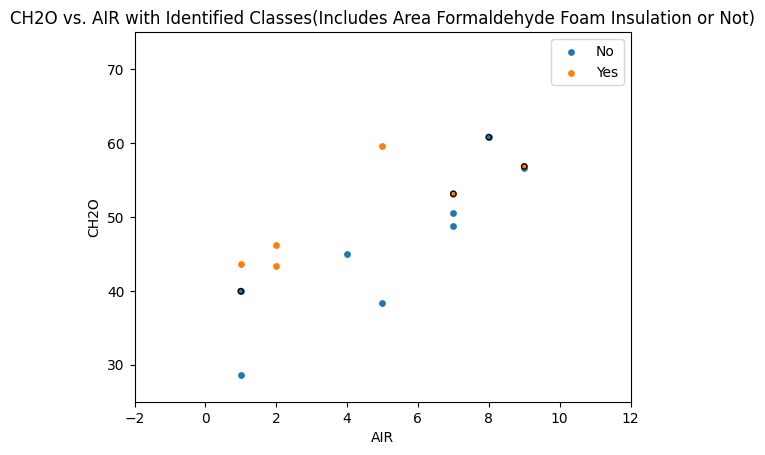

In [ ]:
#Original plot
def Make_2D_Plot_Misclassified_Linear(data, xVar, yVar, Class, model = None):
    plt.xlim([-2, 12])
    plt.ylim([25, 75])

    for group_id, group_members in data.groupby(Class):
      plt.scatter(group_members[xVar], group_members[yVar], s=15, label=group_id)

    if model:
      for i in range(len(train_houses)):
        observation_data = {'AIR': [train_houses['AIR'][i]],
                          'CH2O': [train_houses['CH2O'][i]]}
        train_obs = pd.DataFrame(observation_data)
        observation_target =  train_houses['UFFI'][i]
        if linearmodel.predict(train_obs) != observation_target:
          plt.scatter(train_obs['AIR'], train_obs['CH2O'], color = 'black', facecolors='none', s = 15)
          plt.xlabel(xVar)
          plt.ylabel(yVar)
          plt.title(yVar + ' vs. ' + xVar + ' with Identified Classes(Includes Area Formaldehyde Foam Insulation or Not)')
    plt.legend()
    plt.show()

Make_2D_Plot_Misclassified_Linear(train_houses, 'AIR', 'CH2O', 'UFFI', linearmodel)


Linear Kernel Classfication Matrix




In [ ]:
test_predictor_variables_1 = test_houses[['AIR', 'CH2O']]
classifications = linearmodel.predict(test_predictor_variables_1)
data = {'Actual': test_houses['UFFI'],
        'Predictions': classifications}
df = pd.DataFrame(data)
linear = pd.crosstab(df['Actual'], df['Predictions'])
linear

Predictions,No,Yes
Actual,,
No,3,1
Yes,0,6


Linear Kernel Misclassification Rate

In [ ]:
misclassification_linear = (0+1)/10
print("Linear_misclassification_rate:", misclassification_linear)

Linear_misclassification_rate: 0.1


Polynomial Kernel

In [ ]:
parameters = {'kernel': ['poly'],
              'C': [0.01, 0.1, 1, 10, 100],
              'degree': [2, 3, 4, 5, 6]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output = tuning.fit(train_predictor_variables, train_houses['UFFI'])
tuning_output.best_params_
best_model_poly = tuning_output.best_estimator_

{'C': 10, 'degree': 5, 'kernel': 'poly'}

Visualizing Polynomial misclassifications:

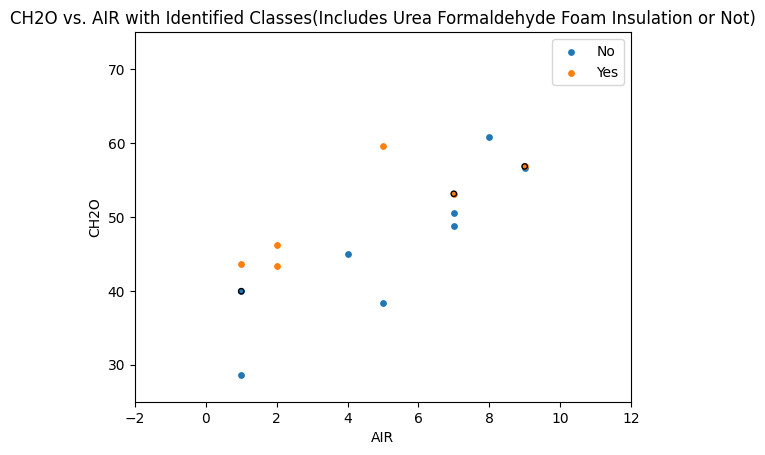

In [ ]:
def Make_2D_Plot_Misclassified_Poly(data, xVar, yVar, Class, model = None):
    plt.xlim([-2, 12])
    plt.ylim([25, 75])

    for group_id, group_members in data.groupby(Class):
      plt.scatter(group_members[xVar], group_members[yVar], s=15, label=group_id)

    if model:
      for i in range(len(train_houses)):
        observation_data = {'AIR': [train_houses['AIR'][i]],
                          'CH2O': [train_houses['CH2O'][i]]}
        train_obs = pd.DataFrame(observation_data)
        observation_target =  train_houses['UFFI'][i]
        if best_model_poly.predict(train_obs) != observation_target:
          plt.scatter(train_obs['AIR'], train_obs['CH2O'], color = 'black', facecolors='none', s = 15)
          plt.xlabel(xVar)
          plt.ylabel(yVar)
          plt.title(yVar + ' vs. ' + xVar + ' with Identified Classes(Includes Urea Formaldehyde Foam Insulation or Not)')

    plt.legend()
    plt.show()

Make_2D_Plot_Misclassified_Poly(train_houses, 'AIR', 'CH2O', 'UFFI', best_model_poly)


Polynomial Kernel Misclassification Matrix

In [ ]:
classifications = best_model_poly.predict(test_predictor_variables_1)
data = {'Actual': test_houses['UFFI'],
        'Predictions': classifications}
df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])

Predictions,No,Yes
Actual,,
No,3,1
Yes,1,5


Misclassification Rate:

In [ ]:
poly_misclassification_rate = (1+1)/(10)
print("poly_misclassification_rate:", poly_misclassification_rate)

poly_misclassification_rate: 0.2


Radial Kernel

In [ ]:
# Radial Kernel:
parameters = {'kernel': ['rbf'],
              'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.5, 1, 5, 10]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output = tuning.fit(train_predictor_variables, train_houses['UFFI'])
tuning_output.best_params_
radial_model = tuning_output.best_estimator_

Radial Misclassification Plot

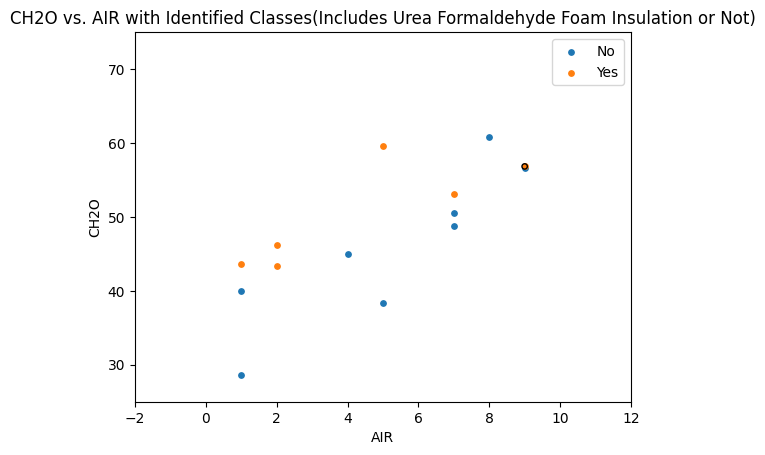

In [ ]:
def Make_2D_Plot_Misclassified_radial(data, xVar, yVar, Class, model = None):
    plt.xlim([-2, 12])
    plt.ylim([25, 75])

    for group_id, group_members in data.groupby(Class):
      plt.scatter(group_members[xVar], group_members[yVar], s=15, label=group_id)

    if model:
      for i in range(len(train_houses)):
        observation_data = {'AIR': [train_houses['AIR'][i]],
                          'CH2O': [train_houses['CH2O'][i]]}
        train_obs = pd.DataFrame(observation_data)
        observation_target =  train_houses['UFFI'][i]
        if radial_model.predict(train_obs) != observation_target:
          plt.scatter(train_obs['AIR'], train_obs['CH2O'], color = 'black', facecolors='none', s = 15)
          plt.xlabel(xVar)
          plt.ylabel(yVar)
          plt.title(yVar + ' vs. ' + xVar + ' with Identified Classes(Includes Urea Formaldehyde Foam Insulation or Not)')

    plt.legend()
    plt.show()

Make_2D_Plot_Misclassified_radial(train_houses, 'AIR', 'CH2O', 'UFFI', radial_model)


Kernel Misclassification Matrix

In [ ]:
classifications = radial_model.predict(test_predictor_variables_1)
data = {'Actual': test_houses['UFFI'],
        'Predictions': classifications}
df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])

Predictions,No,Yes
Actual,,
No,4,0
Yes,5,1


Radial misclassification Rate

In [ ]:
misclassification_rbf = (5+0)/(10)
print("radial_misclassification_rate:", misclassification_rbf)

radial_misclassification_rate: 0.5


In [ ]:
# Model Deployment:
New_Data = {'AIR': [5, 3],
            'CH2O': [55, 45]}
New_House = pd.DataFrame(New_Data)
linearmodel.predict(New_House)


array(['Yes', 'Yes'], dtype=object)